# Xin Y. et al. Human Pancreas (SMARTer)

## Reference:    
[Xin Y, Kim J, Okamoto H, Ni M et al. RNA Sequencing of Single Human Islet Cells Reveals Type 2 Diabetes Genes. Cell Metab 2016 Oct 11;24(4):608-615.](https://www.ncbi.nlm.nih.gov/pubmed/27667665)

## GEO:    
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE81608

In [1]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")

from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


download counts

In [2]:
cts = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE81nnn/GSE81608/suppl/GSE81608_human_islets_rpkm.txt.gz",\
                 sep='\t', index_col=0)

In [3]:
cts.head()

,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,...,Sample_1591,Sample_1592,Sample_1593,Sample_1594,Sample_1595,Sample_1596,Sample_1597,Sample_1598,Sample_1599,Sample_1600
gene.id,,,,,,,,,,,,,,,,,,,,,
1,47.3396,24.0458,2.2743,0.0,0.0000,0.0,0.0,0.000,0.0,2.0351,...,0.0,0.3304,2.4857,0.0,8.1498,0.0,0.5372,31.1225,0.0000,0.5788
2,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.254,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,47.4664,0.0000
3,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.000,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0,130.9796,0.0,0.0,0.000,0.0,79.5905,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
10,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.000,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000


In [4]:
cts.shape

(39851, 1600)

In [5]:
# wget https://s3.amazonaws.com/scrnaseq-public-datasets/manual-data/xin/human_gene_annotation.csv
# wget https://s3.amazonaws.com/scrnaseq-public-datasets/manual-data/xin/human_islet_cell_identity.txt

In [6]:
obs = pd.read_csv("https://s3.amazonaws.com/scrnaseq-public-datasets/manual-data/xin/human_islet_cell_identity.txt",\
                  sep='\t', index_col=0)

obs.index = obs.index.str.replace(' ','_')

In [7]:
obs.head()

,title,source.name,organism,tissue,molecule,processed.data.file,raw.file,donor.id,condition,age,ethnicity,gender,cell.type
Sample.name,,,,,,,,,,,,,
Sample_1,Islet cell,Pancreatic islets,Homo sapiens,Pancreatic islets,mRNA,expr_rpkm.txt,Sample_1.fq.gz,Non T2D 1,Healthy,23,AA,M,beta
Sample_2,Islet cell,Pancreatic islets,Homo sapiens,Pancreatic islets,mRNA,expr_rpkm.txt,Sample_2.fq.gz,Non T2D 1,Healthy,23,AA,M,beta
Sample_3,Islet cell,Pancreatic islets,Homo sapiens,Pancreatic islets,mRNA,expr_rpkm.txt,Sample_3.fq.gz,Non T2D 1,Healthy,23,AA,M,beta
Sample_4,Islet cell,Pancreatic islets,Homo sapiens,Pancreatic islets,mRNA,expr_rpkm.txt,Sample_4.fq.gz,Non T2D 1,Healthy,23,AA,M,beta
Sample_5,Islet cell,Pancreatic islets,Homo sapiens,Pancreatic islets,mRNA,expr_rpkm.txt,Sample_5.fq.gz,Non T2D 1,Healthy,23,AA,M,beta


In [8]:
var = pd.read_csv("https://s3.amazonaws.com/scrnaseq-public-datasets/manual-data/xin/human_gene_annotation.csv",index_col=0)

In [9]:
ad = sc.AnnData(scipy.sparse.csr_matrix(cts.values.T))
ad.obs_names = cts.columns
ad.var_names = cts.index
ad = ad[ad.obs_names.isin(obs.index),:]
ad.obs = obs.loc[ad.obs_names]

AnnData expects string indices for some functionality, but your first two indices are: Int64Index([1, 2], dtype='int64', name='gene.id'). 
Transforming to str index.


In [10]:
ad.obs['cell'] = ad.obs['cell.type']

In [11]:
ad.var['gene.id'] = ad.var_names
ad.var['symbol'] = var.loc[ad.var_names.astype(int)]['symbol'].tolist()
ad.var_names = make_unique(ad.var['symbol'])

In [12]:
ad.raw = sc.pp.log1p(ad,copy=True)

In [13]:
ad.shape

(1600, 39851)

In [14]:
ad.write("../write/Xin2016Pancreas.h5")

... storing 'title' as categorical
... storing 'source.name' as categorical
... storing 'organism' as categorical
... storing 'tissue' as categorical
... storing 'molecule' as categorical
... storing 'processed.data.file' as categorical
... storing 'donor.id' as categorical
... storing 'condition' as categorical
... storing 'ethnicity' as categorical
... storing 'gender' as categorical
... storing 'cell.type' as categorical
... storing 'cell' as categorical


In [15]:
ls -lh ../write/Xin2016Pancreas.h5

-rw-r--r--  1 zmiao  384566875   150M  8 Oct 15:43 ../write/Xin2016Pancreas.h5


In [2]:
ad = sc.read("../write/Xin2016Pancreas.h5")

In [3]:
ad.X

<1600x39851 sparse matrix of type '<class 'numpy.float32'>'
	with 9162358 stored elements in Compressed Sparse Row format>

In [4]:
ad.raw.X

<1600x39851 sparse matrix of type '<class 'numpy.float32'>'
	with 9162358 stored elements in Compressed Sparse Row format>

In [17]:
sc.pp.filter_cells(ad, min_genes=200)
# sc.pp.filter_genes(ad, min_cells=3)

sc.pp.filter_genes(ad, min_cells=20)

In [18]:
ad.obs['cell'].value_counts()

alpha                 886
beta                  472
PP                     85
alpha.contaminated     60
delta                  49
beta.contaminated      31
delta.contaminated      9
PP.contaminated         8
Name: cell, dtype: int64

In [19]:
ad = ad[~ad.obs['cell'].str.endswith('contaminated'),:]

In [20]:
ad

View of AnnData object with n_obs × n_vars = 1492 × 22183 
    obs: 'title', 'source.name', 'organism', 'tissue', 'molecule', 'processed.data.file', 'raw.file', 'donor.id', 'condition', 'age', 'ethnicity', 'gender', 'cell.type', 'cell', 'n_genes'
    var: 'gene.id', 'symbol', 'n_cells'

In [21]:
sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e4)

Trying to set attribute `.obs` of view, making a copy.


In [22]:
sc.pp.log1p(ad)
# sc_pp_regress_out(ad,keys=['n_counts','n_genes','individual'])
# sc.pp.scale(ad, max_value=10)
sc.tl.pca(ad)

In [23]:
sc.tl.tsne(ad, n_pcs=50)
sc.pp.neighbors(ad, n_pcs=50)
sc.tl.umap(ad)
sc.tl.louvain(ad, resolution=0.5)

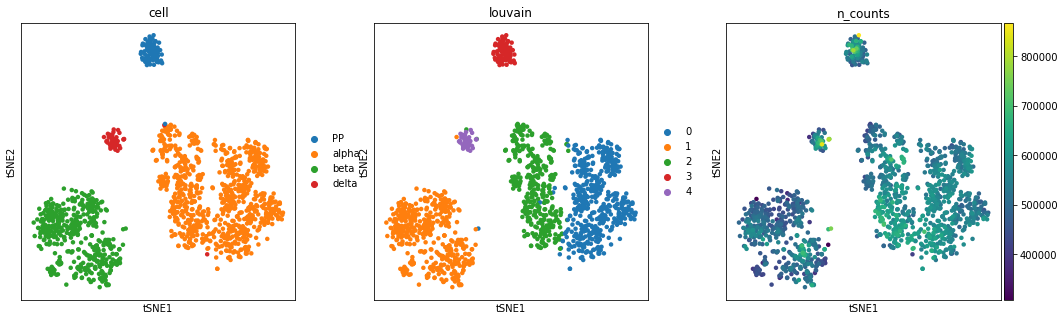

In [24]:
figsize(5,5)
sc.pl.tsne(ad, color=['cell','louvain','n_counts'])

In [25]:
ad.write("../write/Xin2016Pancreas_reg.h5")

# End